In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image

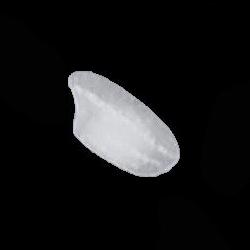

In [2]:
img = Image.open("./data/Rice_Image_Dataset/Arborio/Arborio (5).jpg")
img

In [3]:
img.size

(250, 250)

In [4]:
data = tf.keras.utils.image_dataset_from_directory(
    "./data/Rice_Image_Dataset",  
    image_size=(32,32),
    color_mode="rgb",
    batch_size=75000
)
data

Found 75000 files belonging to 5 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
model = tf.keras.Sequential([
    layers.Conv2D(18,5,input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10),
    layers.Activation("softmax")
])

In [6]:
model.build(input_shape=(1,32,32,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 18)        1368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 18)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 36)        5868      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 36)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 36)          11700     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 36)         0

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["Accuracy"]
)

In [8]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,10)
    model.fit(features,labels,batch_size=50,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 84s 54ms/step - loss: 0.1987 - Accuracy: 0.9292
Epoch 2/10
1500/1500 [==============================] - 80s 53ms/step - loss: 0.0802 - Accuracy: 0.9735
Epoch 3/10
1500/1500 [==============================] - 77s 51ms/step - loss: 0.0565 - Accuracy: 0.9815
Epoch 4/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0503 - Accuracy: 0.9834
Epoch 5/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0397 - Accuracy: 0.9868
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0349 - Accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0308 - Accuracy: 0.9896
Epoch 8/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0279 - Accuracy: 0.9908
Epoch 9/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0267 - Accuracy: 0.9911
Epoch 10/10
1500/1500 [==============================] - 36s 24m

In [ ]:
model.save("/data/Rice_Image_Dataset.h5")